In [1]:
import pandas as pd
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="nareshit",
    database="gymdb"
)

cursor = conn.cursor()

# Create Trainers table FIRST
cursor.execute("""
CREATE TABLE IF NOT EXISTS Trainers(
    Trainer_id INT PRIMARY KEY AUTO_INCREMENT,
    T_Name VARCHAR(30),
    Specialization VARCHAR(30),
    Experience INT
)
""")
print("Trainer table is created")

# Members table 
cursor.execute("""
CREATE TABLE IF NOT EXISTS Members(
    Member_id INT PRIMARY KEY AUTO_INCREMENT,
    Name VARCHAR(360),
    Age INT,
    Gender VARCHAR(10),
    Phone VARCHAR(15),
    Email VARCHAR(35),
    Join_Dt DATE,
    Trainer_id INT,
    FOREIGN KEY (Trainer_id) REFERENCES Trainers(Trainer_id)
)
""")
print("Members table is created")

# Membership table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Membership(
    Membership_id INT PRIMARY KEY AUTO_INCREMENT,
    Member_id INT,
    Plan VARCHAR(30),
    Start_dt DATE,
    End_dt DATE,
    Amount DECIMAL(10,2),
    FOREIGN KEY(Member_id) REFERENCES Members(Member_id)
)
""")
print("Membership table is created")

# Payments table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Payment(
    Payment_id INT PRIMARY KEY AUTO_INCREMENT,
    Member_id INT,
    Amount DECIMAL(10,2),
    Payment_dt DATE,
    Payment_method VARCHAR(30),
    FOREIGN KEY (Member_id) REFERENCES Members(Member_id)
)
""")
print("Payment table created")

# Classes table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Classes(
    Class_id INT PRIMARY KEY AUTO_INCREMENT,
    Class_Name VARCHAR(20),
    Trainer_id INT,
    Schedule_time VARCHAR(30),
    FOREIGN KEY (Trainer_id) REFERENCES Trainers(Trainer_id)
)
""")
print("Classes table created")

# Attendance table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Attendances(
    Attendance_id INT PRIMARY KEY AUTO_INCREMENT,
    Member_id INT,
    Class_id INT,
    Dt DATE,
    FOREIGN KEY (Member_id) REFERENCES Members(Member_id),
    FOREIGN KEY (Class_id) REFERENCES Classes(Class_id)
)
""")
print("Attendances table is created")

# Equipment table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Equipments(
    Equipment_id INT PRIMARY KEY AUTO_INCREMENT,
    Eq_Name VARCHAR(30),
    Purchase_dt DATE,
    Quantity INT,
    Condition_status VARCHAR(15)
)
""")
print("Equipment table is created")

conn.commit()
print("All tables are created successfully!")

#--------------------------------------------------------------
#Delete old data
#--------------------------------------------------------------
cursor.execute("SET FOREIGN_KEY_CHECKS = 0")
cursor.execute("TRUNCATE TABLE Attendances")
cursor.execute("TRUNCATE TABLE Payment")
cursor.execute("TRUNCATE TABLE Membership")
cursor.execute("TRUNCATE TABLE Classes")
cursor.execute("TRUNCATE TABLE Members")
cursor.execute("TRUNCATE TABLE Trainers")
cursor.execute("TRUNCATE TABLE Equipments")
cursor.execute("SET FOREIGN_KEY_CHECKS = 1")
conn.commit()

#Insertion of tables

int_query = """
INSERT INTO Trainers (T_Name, Specialization, Experience)
VALUES (%s, %s, %s)
"""

trainers_data = [
    ("Ramesh Kumar", "Strength Training", 5),
    ("Anita Sharma", "Yoga", 3),
    ("Karthik Reddy", "Cardio", 4),
    ("Priya Nair", "Zumba", 2),
    ("Suresh Babu", "CrossFit", 6),
    ("Meera Joshi", "Pilates", 3),
    ("Arjun Verma", "Bodybuilding", 7),
    ("Sneha Patel", "Aerobics", 4),
    ("Deepak Singh", "Weight Loss", 5),
    ("Lakshmi Devi", "Power Yoga", 4),
    ("Rahul Mehta", "Functional Training", 6),
    ("Divya Kapoor", "Dance Fitness", 2),
    ("Vijay Kumar", "HIIT", 3),
    ("Neha Chopra", "Prenatal Fitness", 2),
    ("Harish Reddy", "Strength Training", 8),
    ("Aditi Rao", "Yoga", 5),
    ("Sanjay Gupta", "Cardio Kickboxing", 6),
    ("Pooja Sharma", "Aerobics", 3),
    ("Manoj Kumar", "CrossFit", 4),
    ("Ritika Jain", "Zumba", 3),
    ("Kiran Kumar", "Body Toning", 5),
    ("Swathi Raj", "Pilates", 4),
    ("Akhil Kumar", "HIIT", 3),
    ("Shalini Joshi", "Functional Training", 2),
    ("Mukesh Yadav", "Strength Training", 9)
]

cursor.executemany(int_query, trainers_data)
conn.commit()

print("25 trainer records inserted successfully!")

#inserting into members

int_query = """
INSERT INTO Members(Name,Age,Gender,Phone,Email,Join_Dt,Trainer_id)
 VALUES(%s,%s,%s,%s,%s,%s,%s)
"""
Members_data = [
    
    ("Ravi Kumar", 28, "Male", "9876543210", "ravi.kumar@gmail.com", "2024-01-12", 17),
    ("Anita Reddy", 24, "Female", "9876501234", "anita.reddy@gmail.com", "2024-02-05", 3),
    ("Suresh Varma", 32, "Male", "9876112233", "suresh.varma@gmail.com", "2024-03-10", 22),
    ("Priya Sharma", 27, "Female", "9876123450", "priya.sharma@gmail.com", "2024-01-25", 8),
    ("Karan Patel", 29, "Male", "9876234567", "karan.patel@gmail.com", "2024-04-05", 12),
    ("Neha Gupta", 23, "Female", "9876345678", "neha.gupta@gmail.com", "2024-03-14", 1),
    ("Arjun Mehta", 30, "Male", "9876456789", "arjun.mehta@gmail.com", "2024-05-01", 19),
    ("Divya Kaur", 26, "Female", "9876567890", "divya.kaur@gmail.com", "2024-02-22", 25),
    ("Rahul Singh", 31, "Male", "9876678901", "rahul.singh@gmail.com", "2024-03-30", 4),
    ("Pooja Raj", 25, "Female", "9876789012", "pooja.raj@gmail.com", "2024-04-12", 14),
    ("Aditya Rao", 28, "Male", "9876890123", "aditya.rao@gmail.com", "2024-01-18", 11),
    ("Sneha Menon", 22, "Female", "9876901234", "sneha.menon@gmail.com", "2024-02-28", 20),
    ("Vikas Sharma", 29, "Male", "9876012345", "vikas.sharma@gmail.com", "2024-03-02", 7),
    ("Aishwarya Iyer", 24, "Female", "9876123401", "aish.iyer@gmail.com", "2024-04-08", 23),
    ("Praveen Kumar", 33, "Male", "9876234012", "praveen.k@gmail.com", "2024-05-15", 5),
    ("Swathi Reddy", 25, "Female", "9876340123", "swathi.r@gmail.com", "2024-03-19", 10),
    ("Manish Jain", 30, "Male", "9876450124", "manish.jain@gmail.com", "2024-01-29", 24),
    ("Ritika Singh", 22, "Female", "9876560125", "ritika.singh@gmail.com", "2024-02-11", 2),
    ("Ganesh Babu", 34, "Male", "9876670126", "ganesh.babu@gmail.com", "2024-03-15", 18),
    ("Harini Devi", 26, "Female", "9876780127", "harini.devi@gmail.com", "2024-04-20", 9),
    ("Mahesh Varma", 29, "Male", "9876890128", "mahesh.varma@gmail.com", "2024-05-10", 21),
    ("Lakshmi S", 23, "Female", "9876900129", "lakshmi.s@gmail.com", "2024-03-02", 16),
    ("Rohit Verma", 32, "Male", "9876012355", "rohit.verma@gmail.com", "2024-02-14", 6),
    ("Sandhya Patel", 27, "Female", "9876123566", "sandhya.patel@gmail.com", "2024-04-16", 25),
    ("Gopal R", 35, "Male", "9876234677", "gopal.r@gmail.com", "2024-05-02", 15),
    ("Tarun Yadav", 28, "Male", "9876456899", "tarun.yadav@gmail.com", "2024-02-04", 5),
    ("Meena Kumari", 24, "Female", "9876567900", "meena.k@gmail.com", "2024-04-06", 19),
    ("Naveen Kumar", 30, "Male", "9876678011", "naveen.kumar@gmail.com", "2024-05-12", 3),
    ("Shruti Desai", 25, "Female", "9876789122", "shruti.desai@gmail.com", "2024-03-18", 22),
    ("Bharath R", 33, "Male", "9876890233", "bharath.r@gmail.com", "2024-01-08", 8),
    ("Keerthi S", 22, "Female", "9876900344", "keerthi.s@gmail.com", "2024-02-13", 17),
    ("Chandran P", 29, "Male", "9876012455", "chandran.p@gmail.com", "2024-04-14", 12),
    ("Lavanya C", 23, "Female", "9876123567", "lavanya.c@gmail.com", "2024-03-05", 1),
    ("Sai Teja", 28, "Male", "9876234678", "saiteja@gmail.com", "2024-05-03", 11),
    ("Soniya John", 27, "Female", "9876345789", "soni.john@gmail.com", "2024-02-19", 14),
    ("Manoj Reddy", 31, "Male", "9876456890", "manoj.r@gmail.com", "2024-01-11", 23),
    ("Jennifer Mary", 26, "Female", "9876567901", "jen.mary@gmail.com", "2024-05-06", 18),
    ("Kishore B", 29, "Male", "9876678012", "kishore.b@gmail.com", "2024-03-13", 21),
    ("Savitha Rao", 24, "Female", "9876789123", "savitha.rao@gmail.com", "2024-02-23", 7),
    ("Vignesh P", 33, "Male", "9876890345", "vignesh.p@gmail.com", "2024-01-17", 10),
    ("Pavithra S", 25, "Female", "9876900456", "pavi.s@gmail.com", "2024-04-03", 9),
    ("Jeetendra B", 30, "Male", "9876012567", "jeet.b@gmail.com", "2024-05-11", 5),
    ("Harsha V", 28, "Male", "9876123678", "harsha.v@gmail.com", "2024-02-09", 24),
    ("Sahana R", 23, "Female", "9876234789", "sahana.r@gmail.com", "2024-03-11", 18),
    ("Abdul Rahman", 32, "Male", "9876345890", "abdul.r@gmail.com", "2024-01-05", 16),
    ("Tara Devi", 26, "Female", "9876456901", "tara.devi@gmail.com", "2024-04-09", 4),
    ("Vijay Anand", 29, "Male", "9876567012", "vijay.anand@gmail.com", "2024-02-26", 22),
    ("Naila Fathima", 24, "Female", "9876678123", "naila.f@gmail.com", "2024-03-09", 2),
    ("Rohan Kulkarni", 31, "Male", "9876789234", "rohan.k@gmail.com", "2024-05-14", 25)
]
cursor.executemany(int_query, Members_data)
conn.commit()

print("Data is inserted")

#insert into Membership

int_query = """
INSERT INTO Membership (Member_id,Plan,Start_dt,End_dt,Amount)
VALUES(%s,%s,%s,%s,%s)
"""
Membership_data = [
    (1, "Monthly", "2024-01-12", "2024-02-12", 1200.00),
    (2, "Quarterly", "2024-02-05", "2024-05-05", 3000.00),
    (3, "Monthly", "2024-03-10", "2024-04-10", 1200.00),
    (4, "Half-Yearly", "2024-01-25", "2024-07-25", 6500.00),
    (5, "Yearly", "2024-04-05", "2025-04-05", 12000.00),
    (6, "Monthly", "2024-03-14", "2024-04-14", 1200.00),
    (7, "Quarterly", "2024-05-01", "2024-08-01", 3000.00),
    (8, "Monthly", "2024-02-22", "2024-03-22", 1200.00),
    (9, "Half-Yearly", "2024-03-30", "2024-09-30", 6500.00),
    (10, "Yearly", "2024-04-12", "2025-04-12", 12000.00),
    (11, "Quarterly", "2024-01-18", "2024-04-18", 3000.00),
    (12, "Monthly", "2024-02-28", "2024-03-28", 1200.00),
    (13, "Half-Yearly", "2024-03-02", "2024-09-02", 6500.00),
    (14, "Monthly", "2024-04-08", "2024-05-08", 1200.00),
    (15, "Yearly", "2024-05-15", "2025-05-15", 12000.00),
    (16, "Quarterly", "2024-03-19", "2024-06-19", 3000.00),
    (17, "Monthly", "2024-01-29", "2024-02-29", 1200.00),
    (18, "Monthly", "2024-02-11", "2024-03-11", 1200.00),
    (19, "Quarterly", "2024-03-15", "2024-06-15", 3000.00),
    (20, "Half-Yearly", "2024-04-20", "2024-10-20", 6500.00),
    (21, "Yearly", "2024-05-10", "2025-05-10", 12000.00),
    (22, "Monthly", "2024-03-02", "2024-04-02", 1200.00),
    (23, "Quarterly", "2024-02-14", "2024-05-14", 3000.00),
    (24, "Monthly", "2024-04-16", "2024-05-16", 1200.00),
    (25, "Half-Yearly", "2024-05-02", "2024-11-02", 6500.00),
    (26, "Yearly", "2024-01-21", "2025-01-21", 12000.00),
    (27, "Monthly", "2024-02-04", "2024-03-04", 1200.00),
    (28, "Quarterly", "2024-04-06", "2024-07-06", 3000.00),
    (29, "Monthly", "2024-05-12", "2024-06-12", 1200.00),
    (30, "Half-Yearly", "2024-03-18", "2024-09-18", 6500.00),
    (31, "Quarterly", "2024-01-08", "2024-04-08", 3000.00),
    (32, "Monthly", "2024-02-13", "2024-03-13", 1200.00),
    (33, "Monthly", "2024-04-14", "2024-05-14", 1200.00),
    (34, "Yearly", "2024-03-05", "2025-03-05", 12000.00),
    (35, "Half-Yearly", "2024-05-03", "2024-11-03", 6500.00),
    (36, "Quarterly", "2024-02-19", "2024-05-19", 3000.00),
    (37, "Monthly", "2024-01-11", "2024-02-11", 1200.00),
    (38, "Half-Yearly", "2024-05-06", "2024-11-06", 6500.00),
    (39, "Yearly", "2024-03-13", "2025-03-13", 12000.00),
    (40, "Monthly", "2024-02-23", "2024-03-23", 1200.00),
    (41, "Monthly", "2024-01-17", "2024-02-17", 1200.00),
    (42, "Quarterly", "2024-04-03", "2024-07-03", 3000.00),
    (43, "Half-Yearly", "2024-05-11", "2024-11-11", 6500.00),
    (44, "Monthly", "2024-02-09", "2024-03-09", 1200.00),
    (45, "Yearly", "2024-03-11", "2025-03-11", 12000.00),
    (46, "Quarterly", "2024-01-05", "2024-04-05", 3000.00),
    (47, "Monthly", "2024-04-09", "2024-05-09", 1200.00),
    (48, "Monthly", "2024-02-26", "2024-03-26", 1200.00),
    (49, "Half-Yearly", "2024-03-09", "2024-09-09", 6500.00)
    
]
cursor.executemany(int_query, Membership_data)
conn.commit()
print("inserted data")

#inserting inyo payments

int_query = """
INSERT INTO Payment(Member_id,Amount,Payment_dt,Payment_method)
VALUES (%s,%s,%s,%s)
"""
Payment_data = [
        (1, 1200.00, "2024-01-12", "Cash"),
    (2, 3000.00, "2024-02-05", "UPI"),
    (3, 1200.00, "2024-03-10", "Card"),
    (4, 6500.00, "2024-01-25", "UPI"),
    (5, 12000.00, "2024-04-05", "Cash"),
    (6, 1200.00, "2024-03-14", "UPI"),
    (7, 3000.00, "2024-05-01", "Card"),
    (8, 1200.00, "2024-02-22", "UPI"),
    (9, 6500.00, "2024-03-30", "Cash"),
    (10, 12000.00, "2024-04-12", "UPI"),
    (11, 3000.00, "2024-01-18", "Card"),
    (12, 1200.00, "2024-02-28", "UPI"),
    (13, 6500.00, "2024-03-02", "Cash"),
    (14, 1200.00, "2024-04-08", "UPI"),
    (15, 12000.00, "2024-05-15", "Card"),
    (16, 3000.00, "2024-03-19", "Card"),
    (17, 1200.00, "2024-01-29", "UPI"),
    (18, 1200.00, "2024-02-11", "Cash"),
    (19, 3000.00, "2024-03-15", "UPI"),
    (20, 6500.00, "2024-04-20", "Card"),
    (21, 12000.00, "2024-05-10", "UPI"),
    (22, 1200.00, "2024-03-02", "Card"),
    (23, 3000.00, "2024-02-14", "UPI"),
    (24, 1200.00, "2024-04-16", "Cash"),
    (25, 6500.00, "2024-05-02", "UPI"),
    (26, 12000.00, "2024-01-21", "Card"),
    (27, 1200.00, "2024-02-04", "UPI"),
    (28, 3000.00, "2024-04-06", "UPI"),
    (29, 1200.00, "2024-05-12", "Card"),
    (30, 6500.00, "2024-03-18", "Cash"),
    (31, 3000.00, "2024-01-08", "UPI"),
    (32, 1200.00, "2024-02-13", "Cash"),
    (33, 1200.00, "2024-04-14", "UPI"),
    (34, 12000.00, "2024-03-05", "Card"),
    (35, 6500.00, "2024-05-03", "UPI"),
    (36, 3000.00, "2024-02-19", "Cash"),
    (37, 1200.00, "2024-01-11", "UPI"),
    (38, 6500.00, "2024-05-06", "UPI"),
    (39, 12000.00, "2024-03-13", "Card"),
    (40, 1200.00, "2024-02-23", "Cash"),
    (41, 1200.00, "2024-01-17", "UPI"),
    (42, 3000.00, "2024-04-03", "Card"),
    (43, 6500.00, "2024-05-11", "UPI"),
    (44, 1200.00, "2024-02-09", "Cash"),
    (45, 12000.00, "2024-03-11", "Card"),
    (46, 3000.00, "2024-01-05", "UPI"),
    (47, 1200.00, "2024-04-09", "Cash"),
    (48, 1200.00, "2024-02-26", "Card"),
    (49, 6500.00, "2024-03-09", "UPI")
    
]
cursor.executemany(int_query, Payment_data)
conn.commit()
print("inserted data")

#inserting into classes

int_query = """
INSERT INTO Classes(Class_Name,Trainer_id,Schedule_time)
VALUES(%s,%s,%s)
"""
Classes_data = [
    ("Morning Yoga", 5, "06:00 AM"),
    ("Strength Training", 12, "07:00 AM"),
    ("Cardio Burn", 19, "08:00 AM"),
    ("Zumba Dance", 3, "06:00 PM"),
    ("CrossFit Intense", 14, "07:00 PM"),
    ("Pilates Core", 8, "05:00 PM"),
    ("HIIT Blast", 22, "07:00 AM"),
    ("Body Toning", 1, "08:00 AM"),
    ("Aerobics Fun", 25, "06:30 AM"),
    ("Functional Training", 10, "09:00 AM"),
    ("Evening Yoga", 7, "06:00 PM"),
    ("Weight Loss Program", 18, "07:00 AM"),
    ("Kickboxing Cardio", 4, "05:30 PM"),
    ("Dance Fitness", 16, "06:00 PM"),
    ("Power Yoga", 11, "08:00 AM"),
    ("Bootcamp", 21, "07:00 PM"),
    ("Abs Workout", 9, "06:30 AM"),
    ("Cycling Class", 15, "05:00 PM"),
    ("Mobility Stretching", 6, "04:00 PM"),
    ("Meditation Hour", 13, "06:00 AM")
    ]
cursor.executemany(int_query, Classes_data)
conn.commit()
print("inserted data")

#inserting into Attendences

int_query = """
INSERT INTO Attendances (Member_id,Class_id,Dt)
VALUES (%s,%s,%s)
"""
Attendances_data = [
 (1, 3, "2024-03-01"), (2, 1, "2024-03-02"), (3, 5, "2024-03-02"),
    (4, 7, "2024-03-03"), (5, 2, "2024-03-04"), (6, 6, "2024-03-04"),
    (7, 4, "2024-03-05"), (8, 10, "2024-03-06"), (9, 8, "2024-03-06"),
    (10, 12, "2024-03-07"), (11, 14, "2024-03-08"), (12, 2, "2024-03-09"),
    (13, 6, "2024-03-10"), (14, 3, "2024-03-10"), (15, 9, "2024-03-11"),
    (16, 18, "2024-03-12"), (17, 1, "2024-03-13"), (18, 15, "2024-03-13"),
    (19, 11, "2024-03-14"), (20, 7, "2024-03-15"),
    (21, 13, "2024-03-16"), (22, 4, "2024-03-17"), (23, 6, "2024-03-17"),
    (24, 10, "2024-03-18"), (25, 19, "2024-03-18"), (26, 5, "2024-03-19"),
    (27, 17, "2024-03-19"), (28, 20, "2024-03-20"), (29, 8, "2024-03-21"),
    (30, 3, "2024-03-22"), (31, 4, "2024-03-23"), (32, 2, "2024-03-24"),
    (33, 9, "2024-03-25"), (34, 1, "2024-03-26"), (35, 12, "2024-03-26"),
    (36, 14, "2024-03-27"), (37, 5, "2024-03-28"), (38, 6, "2024-03-28"),
    (39, 3, "2024-03-29"), (40, 11, "2024-03-29"), (41, 8, "2024-03-30"),
    (42, 10, "2024-03-31"), (43, 7, "2024-04-01"), (44, 15, "2024-04-02"),
    (45, 18, "2024-04-03"), (46, 4, "2024-04-04"), (47, 2, "2024-04-04"),
    (48, 9, "2024-04-05"), (49, 13, "2024-04-05")
]
cursor.executemany(int_query, Attendances_data)
conn.commit()
print("inserted data")

#Insert into eqipment

int_query = """
INSERT INTO Equipments (Eq_Name,Purchase_dt,Quantity,Condition_Status)
VALUES (%s,%s,%s,%s)
"""
Equipments_data = [ 
    ("Treadmill", "2023-02-10", 5, "Good"),
    ("Exercise Bike", "2023-03-15", 4, "Good"),
    ("Rowing Machine", "2023-05-20", 2, "Excellent"),
    ("Dumbbells Set", "2022-11-05", 20, "Good"),
    ("Kettlebells", "2023-01-12", 15, "Good"),
    ("Bench Press", "2023-04-08", 3, "Good"),
    ("Squat Rack", "2023-06-30", 2, "Excellent"),
    ("Pullup Bar", "2023-02-22", 4, "Good"),
    ("Yoga Mats", "2023-07-01", 25, "Good"),
    ("Resistance Bands", "2023-08-15", 30, "Good"),
    ("Medicine Balls", "2023-09-10", 10, "Good"),
    ("Punching Bag", "2023-10-05", 3, "Excellent"),
    ("Elliptical Machine", "2023-05-18", 2, "Good"),
    ("Battle Rope", "2023-11-25", 6, "Good"),
    ("Stepper Machine", "2023-03-22", 4, "Good"),
    ("Lat Pulldown Machine", "2023-12-01", 2, "Excellent"),
    ("Smith Machine", "2023-04-12", 1, "Good"),
    ("Cable Crossover", "2023-06-25", 1, "Good"),
    ("Leg Press Machine", "2023-08-30", 2, "Excellent"),
    ("Barbell Set", "2023-09-14", 10, "Good")
]
cursor.executemany(int_query, Equipments_data)
conn.commit()
print("inserted data")
print("All insertion is completed")






             

      

      

            
            
            


Trainer table is created
Members table is created
Membership table is created
Payment table created
Classes table created
Attendances table is created
Equipment table is created
All tables are created successfully!
25 trainer records inserted successfully!
Data is inserted
inserted data
inserted data
inserted data
inserted data
inserted data
All insertion is completed


C:\Users\Hp\AppData\Local\Temp\ipykernel_11876\216431110.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)
C:\Users\Hp\AppData\Local\Temp\ipykernel_11876\216431110.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)
C:\Users\Hp\AppData\Local\Temp\ipykernel_11876\216431110.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)
C:\Users\Hp\AppData\Local\Temp\ipykernel_11876\216431110.py:23: UserWarning: pandas only supports SQLAl

   Payment_id  Member_id   Amount  Payment_dt Payment_method
0           1          1   1200.0  2024-01-12           Cash
1           2          2   3000.0  2024-02-05            UPI
2           3          3   1200.0  2024-03-10           Card
3           4          4   6500.0  2024-01-25            UPI
4           5          5  12000.0  2024-04-05           Cash


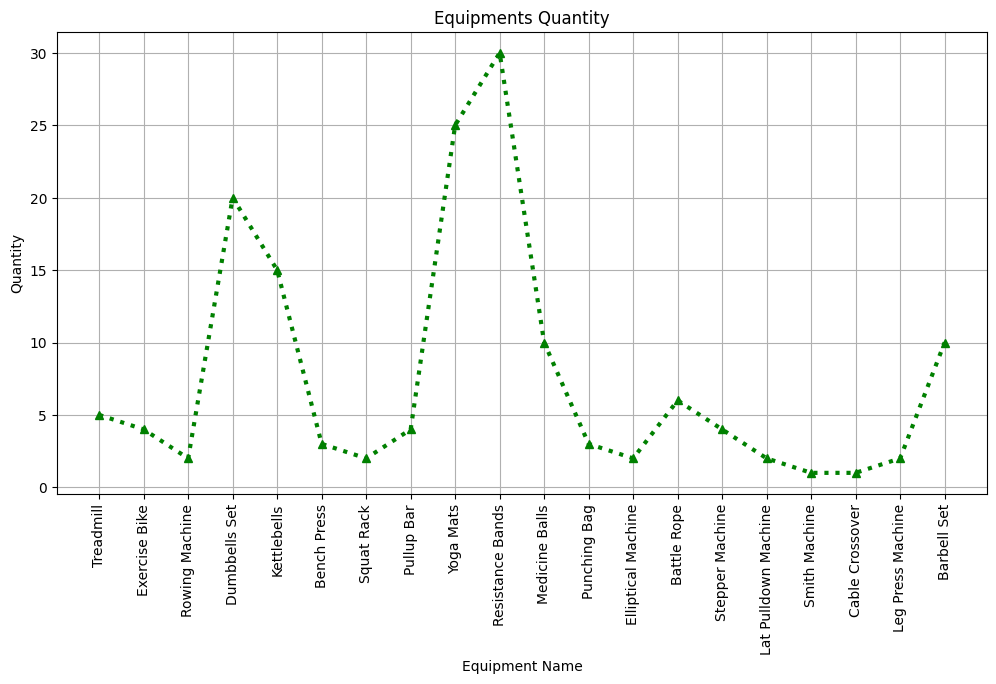

C:\Users\Hp\AppData\Local\Temp\ipykernel_11876\216431110.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df2, palette='cool')


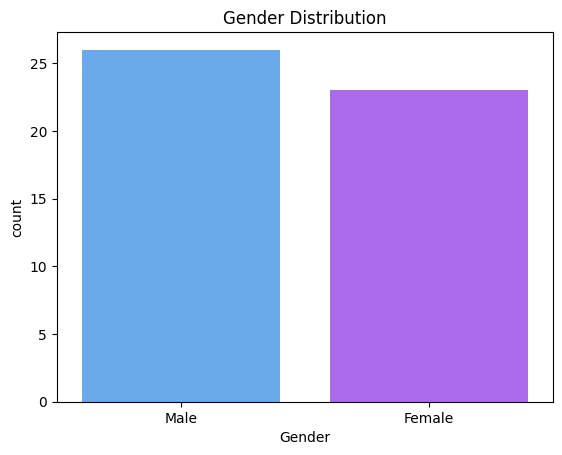

C:\Users\Hp\AppData\Local\Temp\ipykernel_11876\216431110.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Gender',y= 'Age',data=df2, palette='cool')


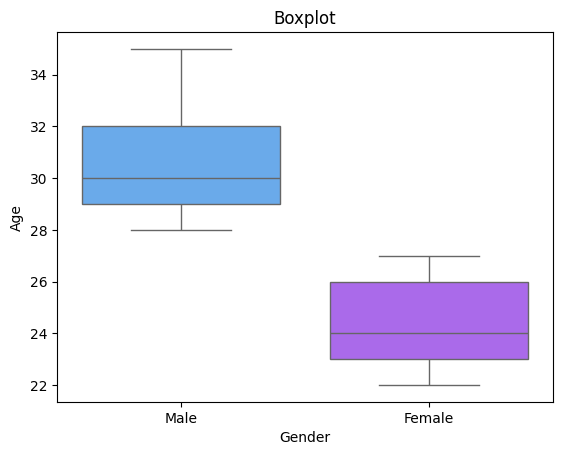

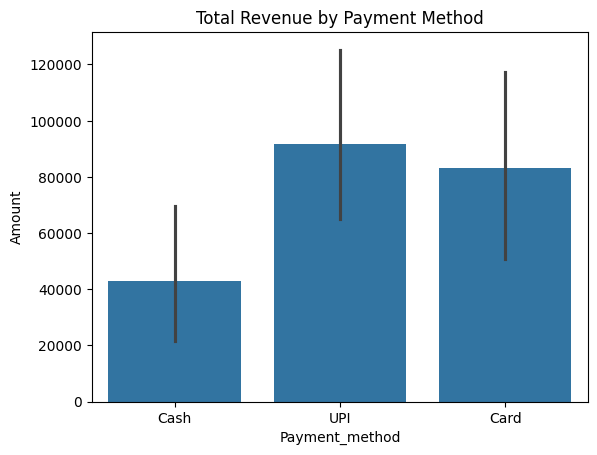

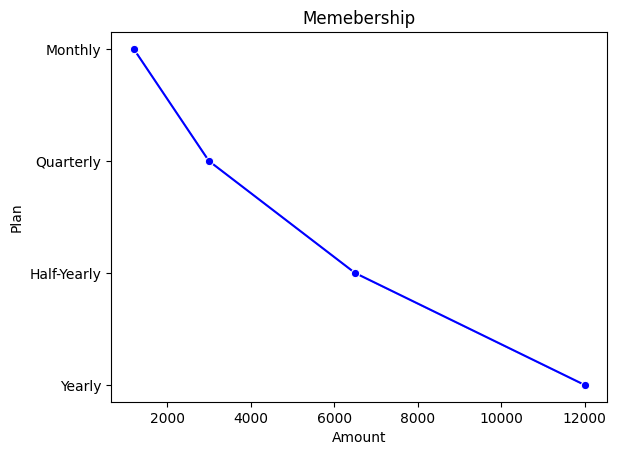

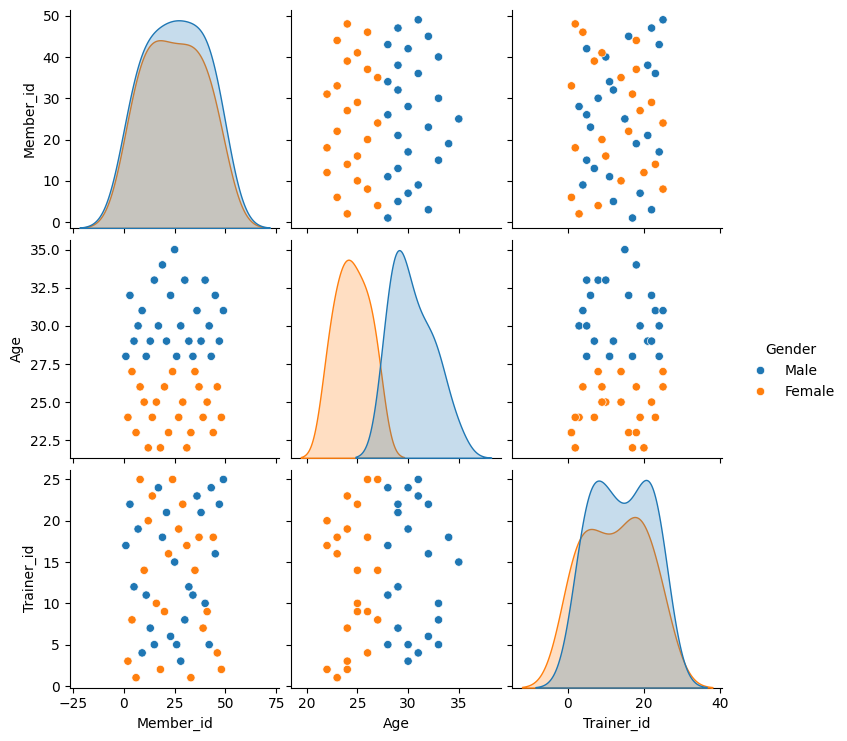

In [12]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="nareshit",
    database="gymdb"
)

query1 = "SELECT * FROM Equipments"
df1 = pd.read_sql(query1, conn)

query2 = "SELECT * FROM Members"
df2 = pd.read_sql(query2, conn)

query3 = "SELECT * FROM Membership"
df3 = pd.read_sql(query3, conn)

query4 ="SELECT * FROM Payment"
df4 = pd.read_sql(query4,conn)

print(df4.head())
#-----------------------------------------------
#using matplotlib line chart
#-----------------------------------------------
x = df1['Eq_Name']
y = df1['Quantity']

plt.figure(figsize=(12,6))
plt.plot(x, y, color='green', linestyle=':', linewidth='3', marker='^')

plt.title("Equipments Quantity")
plt.xlabel("Equipment Name")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

#--------------------------------
#Seaborn
#---------------------------------

sns.countplot(x='Gender', data=df2, palette='cool')
plt.title("Gender Distribution")
plt.show()
#---------------------------------------------------------------------
sns.boxplot(x= 'Gender',y= 'Age',data=df2, palette='cool')
plt.title("Boxplot")
plt.show()
#---------------------------------------------------------------------

#BAR PLOT
sns.barplot(x='Payment_method', y='Amount', data=df4, estimator=sum)
plt.title("Total Revenue by Payment Method")
plt.show()

#LINE PLOT
sns.lineplot(x='Amount',y='Plan',data=df3,marker = 'o', color = 'blue')
plt.title("Memebership")
plt.show()
#PAIR PLOT
sns.pairplot(df2,hue= 'Gender')
plt.show()

